In [2]:
import numpy as np
gt = np.load("./saved_model_1/groundtruth_20_tensor(0.0118).npy")
pr = np.load("./saved_model_1/prediction_20_tensor(0.0118).npy")
print(np.shape(gt), np.shape(pr))

(198, 40962, 3) (198, 40962, 3)


In [3]:
def mse(a1, a2):
    se = np.square(np.subtract(a1,a2))
    mse = se.mean()
    return mse

In [4]:
ch =['tas', 'psl', 'pr']
for i in range(3):
    print(ch[i],": mse = ",mse(gt[:,:,i], pr[:,:,i]))

tas : mse =  0.012171159722122654
psl : mse =  0.014944539623038338
pr : mse =  0.008166293112613767


In [5]:
from interpolate import *

In [21]:
import cartopy.crs as ccrs

def visualize_2d(x, longitude, latitude, title, export_path=None):
    """Visualize the data on a 2D map

    Args:
        x (numpy.array): numpy array with data the size of the longitude and latitude
        longitude (numpy.array): longitude coordinates
        latitude (numpy.array): latitude coordinates
        export_path (string): path and name for saving
    """

    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

    ax.set_global()
    ax.coastlines()

    plt.scatter(longitude, latitude, s=20, c=x, cmap=plt.get_cmap("RdYlBu_r"), alpha=1)
    plt.xticks([-180,-90, 0,+90, 180])
    plt.yticks([-90,-45,0,45,90])
    plt.title(title)
    plt.colorbar(cmap=plt.get_cmap("RdYlBu_r"))
    if export_path:
        plt.savefig(export_path)
        plt.clf()
        plt.cla()
        plt.close()

    else:
        plt.show()

In [7]:
import xarray as xr

path = "/Users/sookim/Desktop/aibedo_sunet/aibedo/skeleton_framework/data/"
inn = xr.open_dataset(path+"Processed_CESM2_r1i1p1f1_historical_Input.nc")
inn['time'][:5]

<xarray.DataArray 'time' (time: 5)>
array([cftime.DatetimeNoLeap(1850, 1, 15, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 2, 14, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 3, 15, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 4, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 5, 15, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 1850-01-15 12:00:00 ... 1850-05-15 12:00:00
Attributes:
    axis:           T
    bounds:         time_bnds
    standard_name:  time
    title:          time
    type:           double

In [8]:
inn['time'][-5:]

<xarray.DataArray 'time' (time: 5)>
array([cftime.DatetimeNoLeap(2014, 8, 15, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 9, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 10, 15, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 11, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 12, 15, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 2014-08-15 12:00:00 ... 2014-12-15 12:00:00
Attributes:
    axis:           T
    bounds:         time_bnds
    standard_name:  time
    title:          time
    type:           double

In [9]:
np.shape(inn.clt[0])

(192, 288)

In [10]:
lon, lat, interpolated_value = interpolate_SphereIcosahedral( 6, inn.clt[0], list(inn.lon), list(inn.lat))

number of vertices for level 6 (2**6)is 40962


In [11]:
np.save("lon.npy", lon)
np.save("lat.npy", lat)

In [12]:
print(np.shape(interpolated_value))

(40962,)


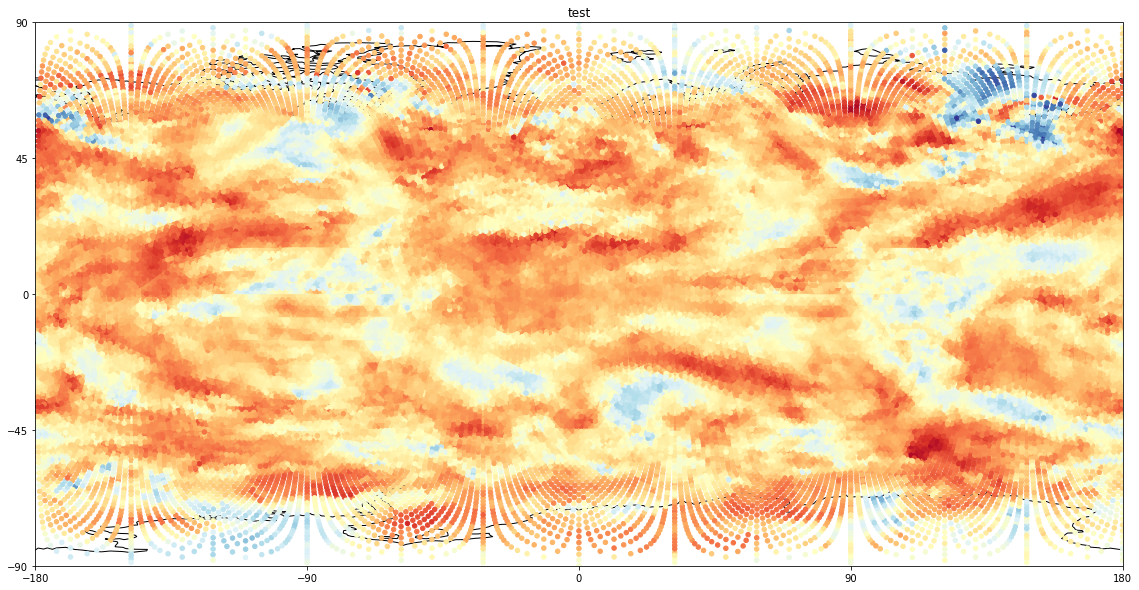

In [15]:
visualize_2d(interpolated_value, lon, lat, "test")

In [16]:
print(np.shape(gt), np.shape(pr))

(198, 40962, 3) (198, 40962, 3)


In [17]:
resolution_SphereIcosahedral(lon,lat)

110.01998936475536

In [42]:
def visualize_2d_all(gt, pr, longitude, latitude, title, export_path=None):
    """Visualize the data on a 2D map

    Args:
        x (numpy.array): numpy array with data the size of the longitude and latitude
        longitude (numpy.array): longitude coordinates
        latitude (numpy.array): latitude coordinates
        export_path (string): path and name for saving
    """

    fig = plt.figure(figsize=(70, 10))
    ax = fig.add_subplot(1, 3, 1, projection=ccrs.PlateCarree())
    ax.set_global()
    ax.coastlines()

    plt.subplot(1, 3, 1)
    plt.scatter(longitude, latitude, s=20, c=gt, cmap=plt.get_cmap("RdYlBu_r"), alpha=1)
    plt.clim(0, 1)
    plt.xticks([-180,-90, 0,+90, 180])
    plt.yticks([-90,-45,0,45,90])
    plt.title("ground truth "+title)
    plt.colorbar(cmap=plt.get_cmap("RdYlBu_r"),fraction=0.046, pad=0.04)

    ax = fig.add_subplot(1, 3, 2, projection=ccrs.PlateCarree())
    ax.set_global()
    ax.coastlines()
    
    plt.subplot(1, 3, 2)
    plt.scatter(longitude, latitude, s=20, c=pr, cmap=plt.get_cmap("RdYlBu_r"), alpha=1)
    plt.xticks([-180,-90, 0,+90, 180])
    plt.yticks([-90,-45,0,45,90])
    plt.clim(0, 1)
    plt.title("prediction "+title)
    plt.colorbar(cmap=plt.get_cmap("RdYlBu_r"),fraction=0.046, pad=0.04)
    
    ax = fig.add_subplot(1, 3, 3, projection=ccrs.PlateCarree())
    ax.set_global()
    ax.coastlines()
    
    plt.subplot(1, 3, 3)
    plt.scatter(longitude, latitude, s=20, c=gt-pr, cmap=plt.get_cmap("RdYlBu_r"), alpha=1)
    plt.xticks([-180,-90, 0,+90, 180])
    plt.yticks([-90,-45,0,45,90])
    plt.clim(-1, 1)
    plt.title("error (gt-pr)"+title)
    plt.colorbar(cmap=plt.get_cmap("RdYlBu_r"),fraction=0.046, pad=0.04)
    if export_path:
        plt.savefig(export_path)
        plt.clf()
        plt.cla()
        plt.close()

    else:
        plt.show()

In [ ]:
import os
ch =['tas', 'psl', 'pr']

for i in range(198):
    for j in range(3):
        visualize_2d_all(gt[i,:,j],pr[i,:,j], lon, lat, ch[j]+" "+str(i), export_path="./saved_model_1/fig/"+ch[j]+"_"+str(i)+".png")
